#Range Queries

#Static Array Queries: Minimum and Sum

Range queries on static arrays involve performing operations such as finding the minimum element within a given range or calculating the sum of elements within a given range. These operations are common in algorithmic problems and data structures.



In [1]:
class SegmentTreeMin:
    def __init__(self, arr):
        self.n = len(arr)
        self.tree = [0] * (2 * self.n)
        # Build the segment tree
        self.build(arr)

    def build(self, arr):
        # Initialize leaves of the tree
        for i in range(self.n):
            self.tree[self.n + i] = arr[i]
        # Build the tree by calculating parents
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = min(self.tree[2 * i], self.tree[2 * i + 1])

    def query_min(self, l, r):
        l += self.n
        r += self.n
        min_val = float('inf')
        while l < r:
            if l % 2 == 1:
                min_val = min(min_val, self.tree[l])
                l += 1
            if r % 2 == 1:
                r -= 1
                min_val = min(min_val, self.tree[r])
            l //= 2
            r //= 2
        return min_val

class SegmentTreeSum:
    def __init__(self, arr):
        self.n = len(arr)
        self.tree = [0] * (2 * self.n)
        # Build the segment tree
        self.build(arr)

    def build(self, arr):
        # Initialize leaves of the tree
        for i in range(self.n):
            self.tree[self.n + i] = arr[i]
        # Build the tree by calculating parents
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = self.tree[2 * i] + self.tree[2 * i + 1]

    def query_sum(self, l, r):
        l += self.n
        r += self.n
        sum_val = 0
        while l < r:
            if l % 2 == 1:
                sum_val += self.tree[l]
                l += 1
            if r % 2 == 1:
                r -= 1
                sum_val += self.tree[r]
            l //= 2
            r //= 2
        return sum_val

In [2]:
arr = [3, 1, 4, 1, 5, 9, 2, 6, 5]
seg_tree_min = SegmentTreeMin(arr)
seg_tree_sum = SegmentTreeSum(arr)

print(seg_tree_min.query_min(1, 5))  # Output: 1 (minimum value in range [1, 5])
print(seg_tree_sum.query_sum(2, 7))   # Output: 21 (sum of values in range [2, 7])

1
21


#Binary Indexed Tree (Fenwick tree)

Binary Indexed Tree (also known as Fenwick Tree) is a data structure that efficiently supports prefix sum queries and updates in an array of numbers.

Source: https://www.geeksforgeeks.org/fenwick-tree-for-competitive-programming/

In [5]:
def sum(idx, F):
    running_sum = 0
    while idx > 0:
        running_sum += F[idx]
        right_most_set_bit = (idx & -idx)
        idx -= right_most_set_bit
    return running_sum

def add(idx, X, F):
    while idx < len(F):
        F[idx] += X
        right_most_set_bit = (idx & -idx)
        idx += right_most_set_bit

def range_query(l, r, F):
    return sum(r, F) - sum(l - 1, F)

def main():
    n = 5

    # 1-based indexing
    arr = [-1e9, 1, 2, 3, 4, 5]
    # Initially, all the values of Fenwick tree are 0
    F = [0] * (n + 1)

    # Build the Fenwick tree
    for i in range(1, n + 1):
        add(i, arr[i], F)

    # Query the sum from index 1 to 3
    print(range_query(1, 3, F))
    # Query the sum from index 2 to 5
    print(range_query(2, 5, F))

    # Update element at index i to X
    i = 3
    X = 7
    # We have passed X - arr[i] to the add method because
    # the add method simply adds a number at a particular index.
    # If we need to update the element, we need to pass
    # the difference between the ith element and X to the add
    # method.
    add(i, X - arr[i], F)

    # Query the sum from index 1 to 3
    print(range_query(1, 3, F))
    # Query the sum from 2 to 5
    print(range_query(2, 5, F))

if __name__ == "__main__":
    main()

6
14
10
18


#Segment trees, Lazy propagation


Source: https://www.geeksforgeeks.org/lazy-propagation-in-segment-tree/

In [8]:
# Python3 implementation of the approach
MAX = 1000

# Ideally, we should not use global variables
# and large constant-sized arrays, we have
# done it here for simplicity.
tree = [0] * MAX; # To store segment tree
lazy = [0] * MAX; # To store pending updates

""" si -> index of current node in segment tree
	ss and se -> Starting and ending indexes of elements
				for which current nodes stores sum.
	us and ue -> starting and ending indexes of update query
	diff -> which we need to add in the range us to ue """
def updateRangeUtil(si, ss, se, us, ue, diff) :

	# If lazy value is non-zero for current node
	# of segment tree, then there are some
	# pending updates. So we need to make sure
	# that the pending updates are done before
	# making new updates. Because this value may be
	# used by parent after recursive calls
	# (See last line of this function)
	if (lazy[si] != 0) :

		# Make pending updates using value
		# stored in lazy nodes
		tree[si] += (se - ss + 1) * lazy[si];

		# checking if it is not leaf node because if
		# it is leaf node then we cannot go further
		if (ss != se) :

			# We can postpone updating children we don't
			# need their new values now.
			# Since we are not yet updating children of si,
			# we need to set lazy flags for the children
			lazy[si * 2 + 1] += lazy[si];
			lazy[si * 2 + 2] += lazy[si];

		# Set the lazy value for current node
		# as 0 as it has been updated
		lazy[si] = 0;

	# out of range
	if (ss > se or ss > ue or se < us) :
		return ;

	# Current segment is fully in range
	if (ss >= us and se <= ue) :

		# Add the difference to current node
		tree[si] += (se - ss + 1) * diff;

		# same logic for checking leaf node or not
		if (ss != se) :

			# This is where we store values in lazy nodes,
			# rather than updating the segment tree itself
			# Since we don't need these updated values now
			# we postpone updates by storing values in lazy[]
			lazy[si * 2 + 1] += diff;
			lazy[si * 2 + 2] += diff;

		return;

	# If not completely in rang, but overlaps,
	# recur for children,
	mid = (ss + se) // 2;
	updateRangeUtil(si * 2 + 1, ss,
					mid, us, ue, diff);
	updateRangeUtil(si * 2 + 2, mid + 1,
					se, us, ue, diff);

	# And use the result of children calls
	# to update this node
	tree[si] = tree[si * 2 + 1] + \
			tree[si * 2 + 2];

# Function to update a range of values
# in segment tree

''' us and eu -> starting and ending indexes
				of update query
	ue -> ending index of update query
	diff -> which we need to add in the range us to ue '''
def updateRange(n, us, ue, diff) :
	updateRangeUtil(0, 0, n - 1, us, ue, diff);

''' A recursive function to get the sum of values
	in given range of the array. The following are
	parameters for this function.
	si --> Index of current node in the segment tree.
		Initially 0 is passed as root is always at'
		index 0
	ss & se --> Starting and ending indexes of the
				segment represented by current node,
				i.e., tree[si]
	qs & qe --> Starting and ending indexes of query
				range '''
def getSumUtil(ss, se, qs, qe, si) :

	# If lazy flag is set for current node
	# of segment tree, then there are
	# some pending updates. So we need to
	# make sure that the pending updates are
	# done before processing the sub sum query
	if (lazy[si] != 0) :

		# Make pending updates to this node.
		# Note that this node represents sum of
		# elements in arr[ss..se] and all these
		# elements must be increased by lazy[si]
		tree[si] += (se - ss + 1) * lazy[si];

		# checking if it is not leaf node because if
		# it is leaf node then we cannot go further
		if (ss != se) :

			# Since we are not yet updating children os si,
			# we need to set lazy values for the children
			lazy[si * 2 + 1] += lazy[si];
			lazy[si * 2 + 2] += lazy[si];

		# unset the lazy value for current node
		# as it has been updated
		lazy[si] = 0;

	# Out of range
	if (ss > se or ss > qe or se < qs) :
		return 0;

	# At this point we are sure that
	# pending lazy updates are done for
	# current node. So we can return value
	# (same as it was for query in our previous post)

	# If this segment lies in range
	if (ss >= qs and se <= qe) :
		return tree[si];

	# If a part of this segment overlaps
	# with the given range
	mid = (ss + se) // 2;
	return (getSumUtil(ss, mid, qs, qe, 2 * si + 1) +
			getSumUtil(mid + 1, se, qs, qe, 2 * si + 2));

# Return sum of elements in range from
# index qs (query start) to qe (query end).
# It mainly uses getSumUtil()
def getSum(n, qs, qe) :

	# Check for erroneous input values
	if (qs < 0 or qe > n - 1 or qs > qe) :
		print("Invalid Input");
		return -1;

	return getSumUtil(0, n - 1, qs, qe, 0);

# A recursive function that constructs
# Segment Tree for array[ss..se].
# si is index of current node in segment
# tree st.
def constructSTUtil(arr, ss, se, si) :

	# out of range as ss can never be
	# greater than se
	if (ss > se) :
		return ;

	# If there is one element in array,
	# store it in current node of
	# segment tree and return
	if (ss == se) :

		tree[si] = arr[ss];
		return;

	# If there are more than one elements,
	# then recur for left and right subtrees
	# and store the sum of values in this node
	mid = (ss + se) // 2;
	constructSTUtil(arr, ss, mid, si * 2 + 1);
	constructSTUtil(arr, mid + 1, se, si * 2 + 2);

	tree[si] = tree[si * 2 + 1] + tree[si * 2 + 2];

''' Function to construct segment tree
from given array. This function allocates memory
for segment tree and calls constructSTUtil()
to fill the allocated memory '''
def constructST(arr, n) :

	# Fill the allocated memory st
	constructSTUtil(arr, 0, n - 1, 0);

# Driver Code
if __name__ == "__main__" :

	arr = [1, 3, 5, 7, 9, 11];
	n = len(arr);

	# Build segment tree from given array
	constructST(arr, n);

	# Print sum of values in array from index 1 to 3
	print("Sum of values in given range =",
						getSum(n, 1, 3));

	# Add 10 to all nodes at indexes from 1 to 5.
	updateRange(n, 1, 5, 10);

	# Find sum after the value is updated
	print("Updated sum of values in given range =",
								getSum( n, 1, 3));

Sum of values in given range = 15
Updated sum of values in given range = 45


#SQRT Decomposition, Sparse Table


Square Root Decomposition (SQRT Decomposition):

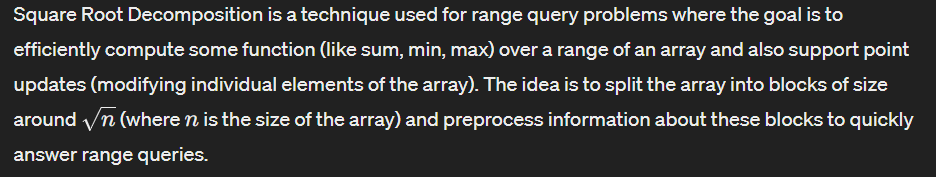

In [9]:
import math

class SQRTDecomposition:
    def __init__(self, arr):
        self.arr = arr
        self.n = len(arr)
        self.block_size = int(math.sqrt(self.n)) + 1
        self.blocks = [0] * self.block_size

        # Preprocess blocks
        for i in range(self.n):
            self.blocks[i // self.block_size] += arr[i]

    def range_sum(self, l, r):
        """ Returns the sum of elements from index l to r (inclusive). """
        total_sum = 0
        start_block = l // self.block_size
        end_block = r // self.block_size

        if start_block == end_block:
            # Same block
            for i in range(l, r + 1):
                total_sum += self.arr[i]
        else:
            # Sum within start block
            for i in range(l, (start_block + 1) * self.block_size):
                total_sum += self.arr[i]
            # Sum across full blocks
            for i in range(start_block + 1, end_block):
                total_sum += self.blocks[i]
            # Sum within end block
            for i in range(end_block * self.block_size, r + 1):
                total_sum += self.arr[i]

        return total_sum

    def update(self, idx, value):
        """ Update the element at index idx to the new value. """
        block_idx = idx // self.block_size
        self.blocks[block_idx] += (value - self.arr[idx])
        self.arr[idx] = value

# Example Usage:
arr = [1, 3, 5, 7, 9, 11, 13, 15]
sqrt_decomp = SQRTDecomposition(arr)

print(sqrt_decomp.range_sum(1, 4))  # Output: 24 (sum of elements from index 1 to 4)
sqrt_decomp.update(3, 10)
print(sqrt_decomp.range_sum(1, 4))  # Output: 27 (after updating index 3 to 10)

24
27


Sparse Table:
Sparse Table is another data structure used for preprocessing data in an array to efficiently answer range queries, particularly for idempotent functions (functions that remain the same upon multiple applications).



In [10]:
class SparseTable:
    def __init__(self, arr):
        self.n = len(arr)
        self.k = int(math.log2(self.n)) + 1
        self.st = [[0] * self.k for _ in range(self.n)]

        # Initialize sparse table for range minimum query
        for i in range(self.n):
            self.st[i][0] = arr[i]

        j = 1
        while (1 << j) <= self.n:
            i = 0
            while (i + (1 << j) - 1) < self.n:
                self.st[i][j] = min(self.st[i][j-1], self.st[i + (1 << (j-1))][j-1])
                i += 1
            j += 1

    def range_min_query(self, l, r):
        """ Returns the minimum element in range [l, r]. """
        j = int(math.log2(r - l + 1))
        return min(self.st[l][j], self.st[r - (1 << j) + 1][j])

# Example Usage:
arr = [2, 7, 3, 0, 5, 8, 4, 1]
sparse_table = SparseTable(arr)

print(sparse_table.range_min_query(2, 5))  # Output: 0 (minimum element in range [2, 5])
print(sparse_table.range_min_query(0, 3))  # Output: 0 (minimum element in range [0, 3])

0
0
